In [2]:
#Required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Loading CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


2025-03-13 13:28:19.105157: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [9]:
#GOOGLENET
from tensorflow.keras.layers import Input, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Inception block
def inception_block(x, filters):
    conv1x1 = Conv2D(filters, (1,1), activation='relu', padding='same')(x)
    
    conv3x3 = Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    
    conv5x5 = Conv2D(filters, (5,5), activation='relu', padding='same')(x)
    
    pooling = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pooling = Conv2D(filters, (1,1), activation='relu', padding='same')(pooling)
    
    return Concatenate()([conv1x1, conv3x3, conv5x5, pooling])

# Google Net model
def create_googlenet():
    inputs = Input(shape=(32,32,3))
    
    x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2,2), strides=2)(x)
    
    x = inception_block(x, 32)
    x = inception_block(x, 64)
    
    x = MaxPooling2D((2,2), strides=2)(x)
    
    x = inception_block(x, 128)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)  # 10 classes
    
    model = Model(inputs, x)
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


googlenet = create_googlenet()
googlenet.summary()

# Training the model
history_googlenet = googlenet.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      2,080 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │     18,464 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     51,232 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │      2,080 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_2[0][0],   │
│                     │                   │            │ conv2d_3[0][0],   │
│                     │                   │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      8,256 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,792 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    204,864 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │      8,256 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 16, 16,    │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_6[0][0],   │
│                     │                   │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 18,333,834 (69.94 MB)

 Trainable params: 18,333,834 (69.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 987s 624ms/step - accuracy: 0.3797 - loss: 1.7081 - val_accuracy: 0.6153 - val_loss: 1.0733
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 974s 623ms/step - accuracy: 0.6178 - loss: 1.0844 - val_accuracy: 0.6901 - val_loss: 0.8794
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 975s 624ms/step - accuracy: 0.6845 - loss: 0.8955 - val_accuracy: 0.6905 - val_loss: 0.8859
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 964s 617ms/step - accuracy: 0.7349 - loss: 0.7581 - val_accuracy: 0.7283 - val_loss: 0.7794
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 970s 621ms/step - accuracy: 0.7639 - loss: 0.6630 - val_accuracy: 0.7348 - val_loss: 0.7713
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 995s 637ms/step - accuracy: 0.7917 - loss: 0.5807 - val_accuracy: 0.7515 - val_loss: 0.7367
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 969s 620ms/step - accuracy: 0.8191 - loss: 0.5090 - val_accuracy: 0.7554 - val_loss: 0.7377
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 858s 549ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


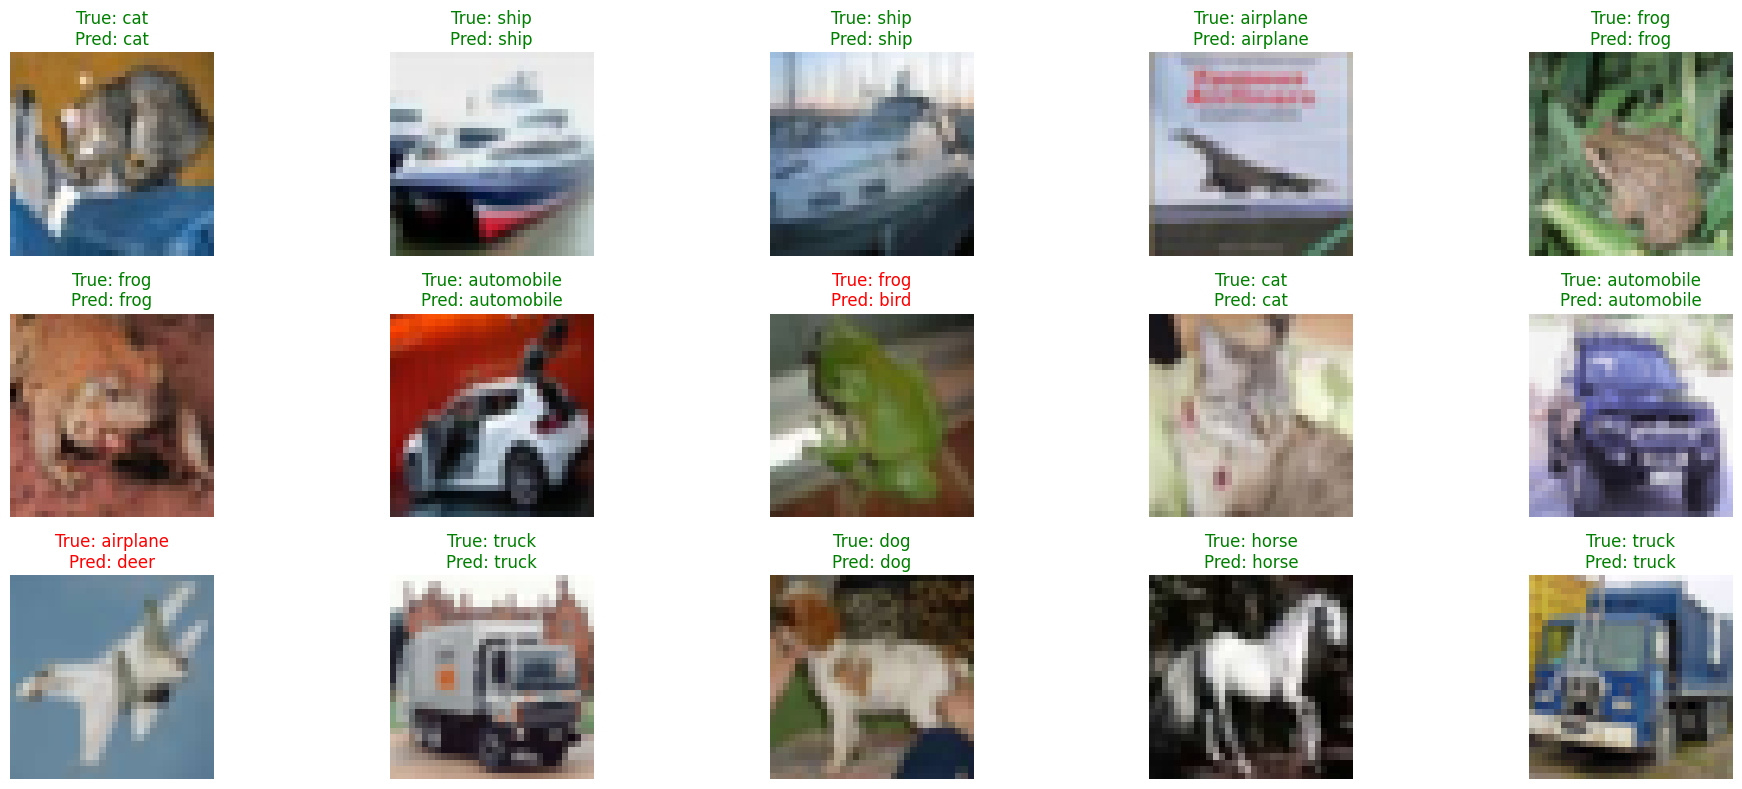

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Classes: CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


num_images = 15
predictions = googlenet.predict(X_test[:num_images])  # Use X_test instead of x_test
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i])
    
   
    true_label = class_names[int(y_test[i])]  
    pred_label = class_names[predicted_labels[i]]
    
    
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


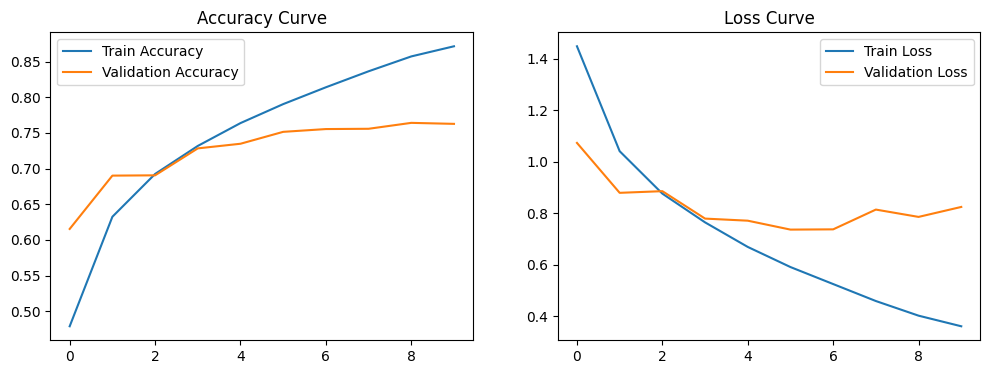

In [15]:
#Plotting the accuracy for both testing and training(validation loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_googlenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_googlenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

#Plotting the loss for both testing and training(validation loss)
plt.subplot(1, 2, 2)
plt.plot(history_googlenet.history['loss'], label='Train Loss')
plt.plot(history_googlenet.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.8012    0.7900    0.7956      1000
           1     0.8847    0.8590    0.8716      1000
           2     0.6958    0.6360    0.6646      1000
           3     0.5690    0.6060    0.5869      1000
           4     0.6756    0.7600    0.7153      1000
           5     0.7151    0.6400    0.6755      1000
           6     0.8250    0.7920    0.8082      1000
           7     0.8074    0.8300    0.8185      1000
           8     0.8234    0.9000    0.8600      1000
           9     0.8453    0.8140    0.8293      1000

    accuracy                         0.7627     10000
   macro avg     0.7642    0.7627    0.7626     10000
weighted avg     0.7642    0.7627    0.7626     10000



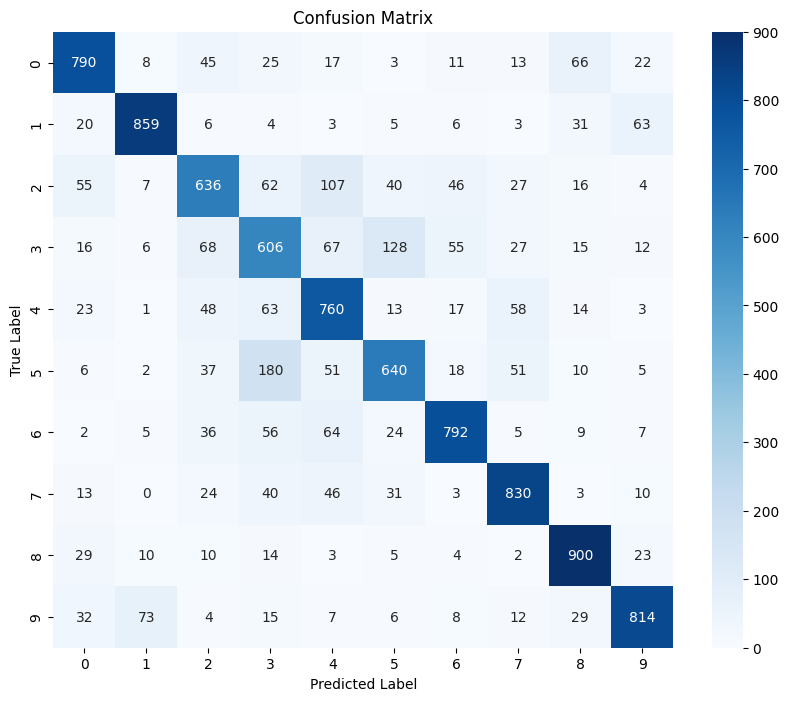

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


y_pred_probs = googlenet.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Implementing CM(confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Findings:
In a comparison with GoogleNet and the simple CNN in the CIFAR-10 dataset, the result indicates that 
the simple CNN performs better than GoogleNet in generalization and stability despite its simpler architecture. 

In spite of the fact that GoogleNet has a higher training accuracy (87.78%) than the CNN (81.10%), it is overfitting, 
as revealed by its lower validation (76.27%) and test accuracy (76.27%). On the other hand, the plain CNN maintains
a nice validation-training accuracy balance, having a higher test accuracy of 81.60% and a lower test loss (0.5830 vs. 0.8247 for GoogleNet),
which implies better optimization.

In addition, the classification report shows that the CNN model has more consistent performance
across all classes, whereas GoogleNet struggles with certain categories for example clas. GoogleNet is computationally expensive, and 
training halted at 10 epochs, whereas the simple CNN trained until 50 epochs but was halted earlier at 39 epochs with the help of
EarlyStopping,revealing a more efficient training. 

On the whole, the simple CNN proves to be the better choice for CIFAR-10 as it generalizes better,
avoids overfitting, and achieves higher accuracy with the help of a simpler and computationally lighter model.

ARCHITECTURAL CHANGES:
The most prominent architectural variations in the basic CNN and GoogleNet are with respect to complexity and structure. 
The basic CNN is a less complicated model with successive convolutional layers, max-pooling, dropout, and batch normalization 
that are all present to restrict overfitting and improve generalization. It uses basic max-pooling to reduce spatial dimensions. 
By contrast, GoogleNet applies inception blocks, which combine various convolution operations (1x1, 3x3, and 5x5) and max-pooling 
in parallel to learn a wider set of features across different scales. This multi-path approach increases model complexity, which
can be related to higher computational cost and increased risk of overfitting, especially on small datasets like CIFAR-10.


In [ ]:
#REFERENCES/CITATIONS:
1. Lecture Slides from 7-10
2. Kaggle
3. OpenAI 
4. GeeksforGeeks
5. Youtube.